# Figure S11. Extended evaluations of GWAS-xQTL colocalization from ColocBoost and competing methods.

- **S11a**. Precision-recall analysis comparing CoS-gene links from AD-xQTL ColocBoost, COLOC-Union, pairwise-ColocBoost-union, and a version of AD-xQTL ColocBoost limited to AD fine-mapped variants (ColocBoost-finemapped-GWAS) against enhancer-gene links predicted by ENCODE-rE2G across 354 biosamples. Error bars along both axis indicate 95% confidence intervals.
- **S11b**.  Precision-Recall for the comparison with enhancer-gene links for each eQTL. COLOC-union only identified colocalization events for a few xQTL, and is excluded from the figure due to a lack of reliable standard error estimation. 
- **S11c,d**. Manhattan plot of the MaxVCP functional annotation scores of variants from c. Pairwise-ColocBoost-union and d. COLOC-union, with labeled genes containing variants with MaxVCP>0.5. Microglia contributions are highlighted in green.

Error bars denote 95% confidence intervals.

## Figure S11a
Precision-recall analysis comparing CoS-gene links from AD-xQTL ColocBoost, COLOC-Union, pairwise-ColocBoost-union, and a version of AD-xQTL ColocBoost limited to AD fine-mapped variants (ColocBoost-finemapped-GWAS) against enhancer-gene links predicted by ENCODE-rE2G across 354 biosamples. Error bars along both axis indicate 95% confidence intervals.

In [4]:
data = readRDS("Figure_S11a.rds")
library(ggplot2)
p <- ggplot(data, aes(x = recall, y = precision, shape = category, color = method)) +
  geom_point(size = 6) +
  geom_errorbar(aes(ymin = precision - precision_sd, ymax = precision + precision_sd), linewidth = 1.5) +
  geom_errorbarh(aes(xmin = recall - recall_sd, xmax = recall + recall_sd), linewidth = 1.5) +
  scale_color_manual(values = c("COLOC (V5)" = "#79AF97FF", 
                                "ColocBoost (Pairwise)" = "#4A7EBBFF",
                                "ColocBoost" = "#B24745FF",
                                "ColocBoost (FM)" = "#F39C12FF")) +
  theme_minimal(base_size = 15) +
  labs(
    title = "",
    x = "Recall",
    y = "Precision",
    color = "Category",
    shape = "Method"
  ) +
  ylim(c(0, 1.02)) +
  xlim(c(0, 0.25)) +
  theme(
    plot.title = element_text(size = 0),
    axis.title.x = element_text(size = 30),
    axis.title.y = element_text(size = 30),
    axis.text.x = element_text(size = 20),
    axis.text.y = element_text(size = 20),
    legend.title = element_text(size = 24),
    legend.text = element_text(size = 20),
    legend.position = "inside",
    strip.text = element_text(size = 0, face = "bold"),
    legend.justification = c(0.9, 0.1),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.5)
  )

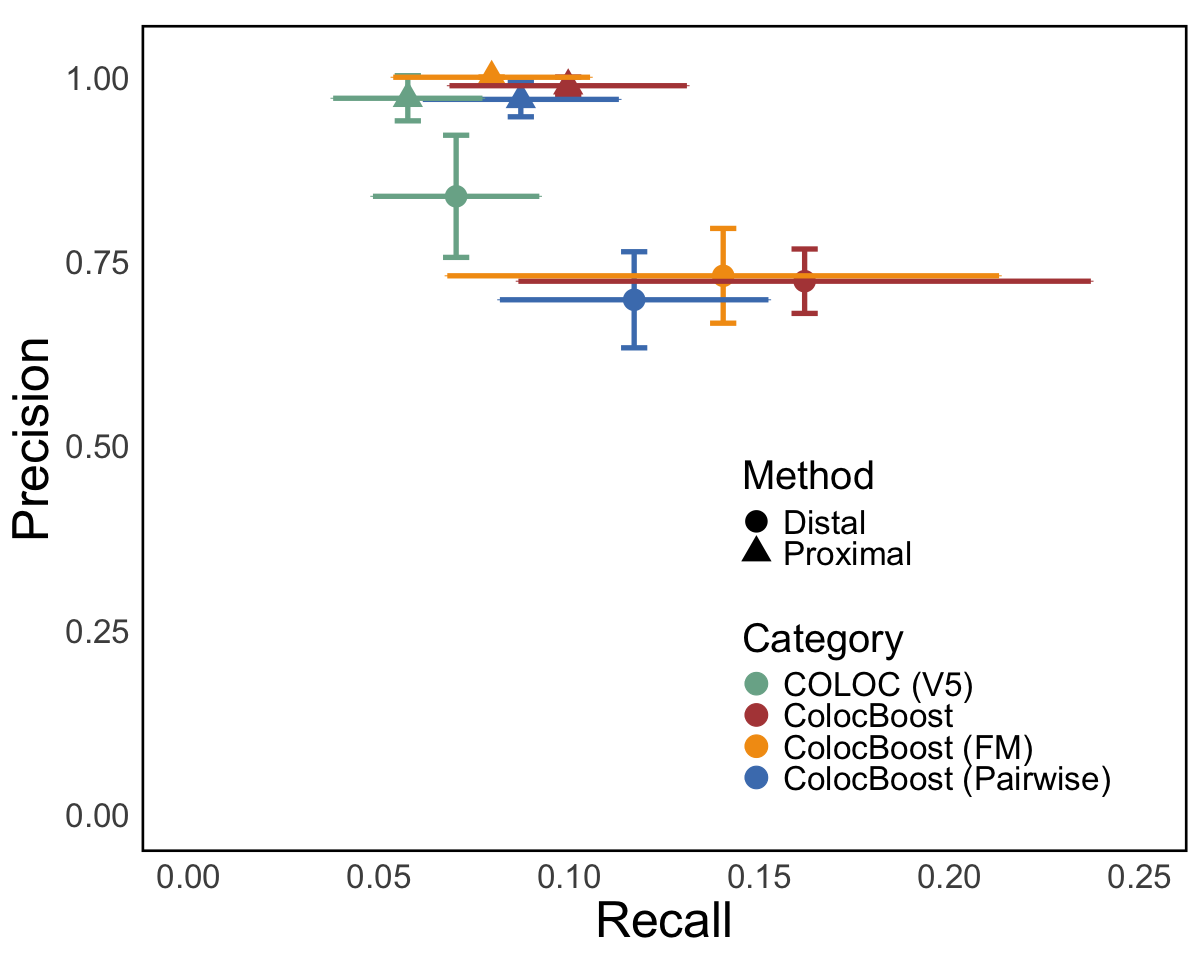

In [6]:
options(repr.plot.width = 10, repr.plot.height = 8)
p

## Figure S11b
 Precision-Recall for the comparison with enhancer-gene links for each eQTL. COLOC-union only identified colocalization events for a few xQTL, and is excluded from the figure due to a lack of reliable standard error estimation.

In [12]:
data = readRDS("Figure_S11b.rds")
library(ggplot2)
sd <- 1.96
p1 <- ggplot(data, aes(x = recall, y = precision, color = method, shape = method)) +
  geom_point(size = 6) +
  scale_shape_manual(values = c("COLOC (V5)" = 17, "ColocBoost" = 15, "ColocBoost (Pairwise)" = 15, "ColocBoost (FM)" = 15)) + 
  guides(shape = "none") +
  geom_errorbar(aes(ymin = precision - sd*precision_sd, ymax = precision + sd*precision_sd), linewidth = 1.5) +
  geom_errorbarh(aes(xmin = recall - sd*recall_sd1, xmax = recall + sd*recall_sd1), linewidth = 1.5) +
  geom_hline(yintercept = 1, linetype = "dashed", color = "grey50", linewidth = 1) +
  scale_color_manual(values = c("COLOC (V5)" = "#79AF97FF", 
                                "ColocBoost (Pairwise)" = "#4A7EBBFF",
                                "ColocBoost" = "#B24745FF",
                                "ColocBoost (FM)" = "#F39C12FF")) +
  facet_wrap(~ QTL, ncol = 5, scales = "free_x") +
  theme_minimal(base_size = 15) +
  labs(
    title = "",
    x = "Recall",
    y = "Precision",
    color = "Category",
    shape = "Method"
  ) +
  ylim(c(0, 1.25)) +
  # xlim(c(0, 0.15)) +
  theme(
    plot.title = element_text(size = 0),
    axis.title.x = element_text(size = 30),
    axis.title.y = element_text(size = 30),
    axis.text.x = element_text(size = 20),
    axis.text.y = element_text(size = 20),
    legend.title = element_text(size = 24),
    legend.text = element_text(size = 20),
    legend.position = "bottom",
    strip.text = element_text(size = 0, face = "bold"),
    # legend.justification = c(0.9, 0.3),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.5)
  )

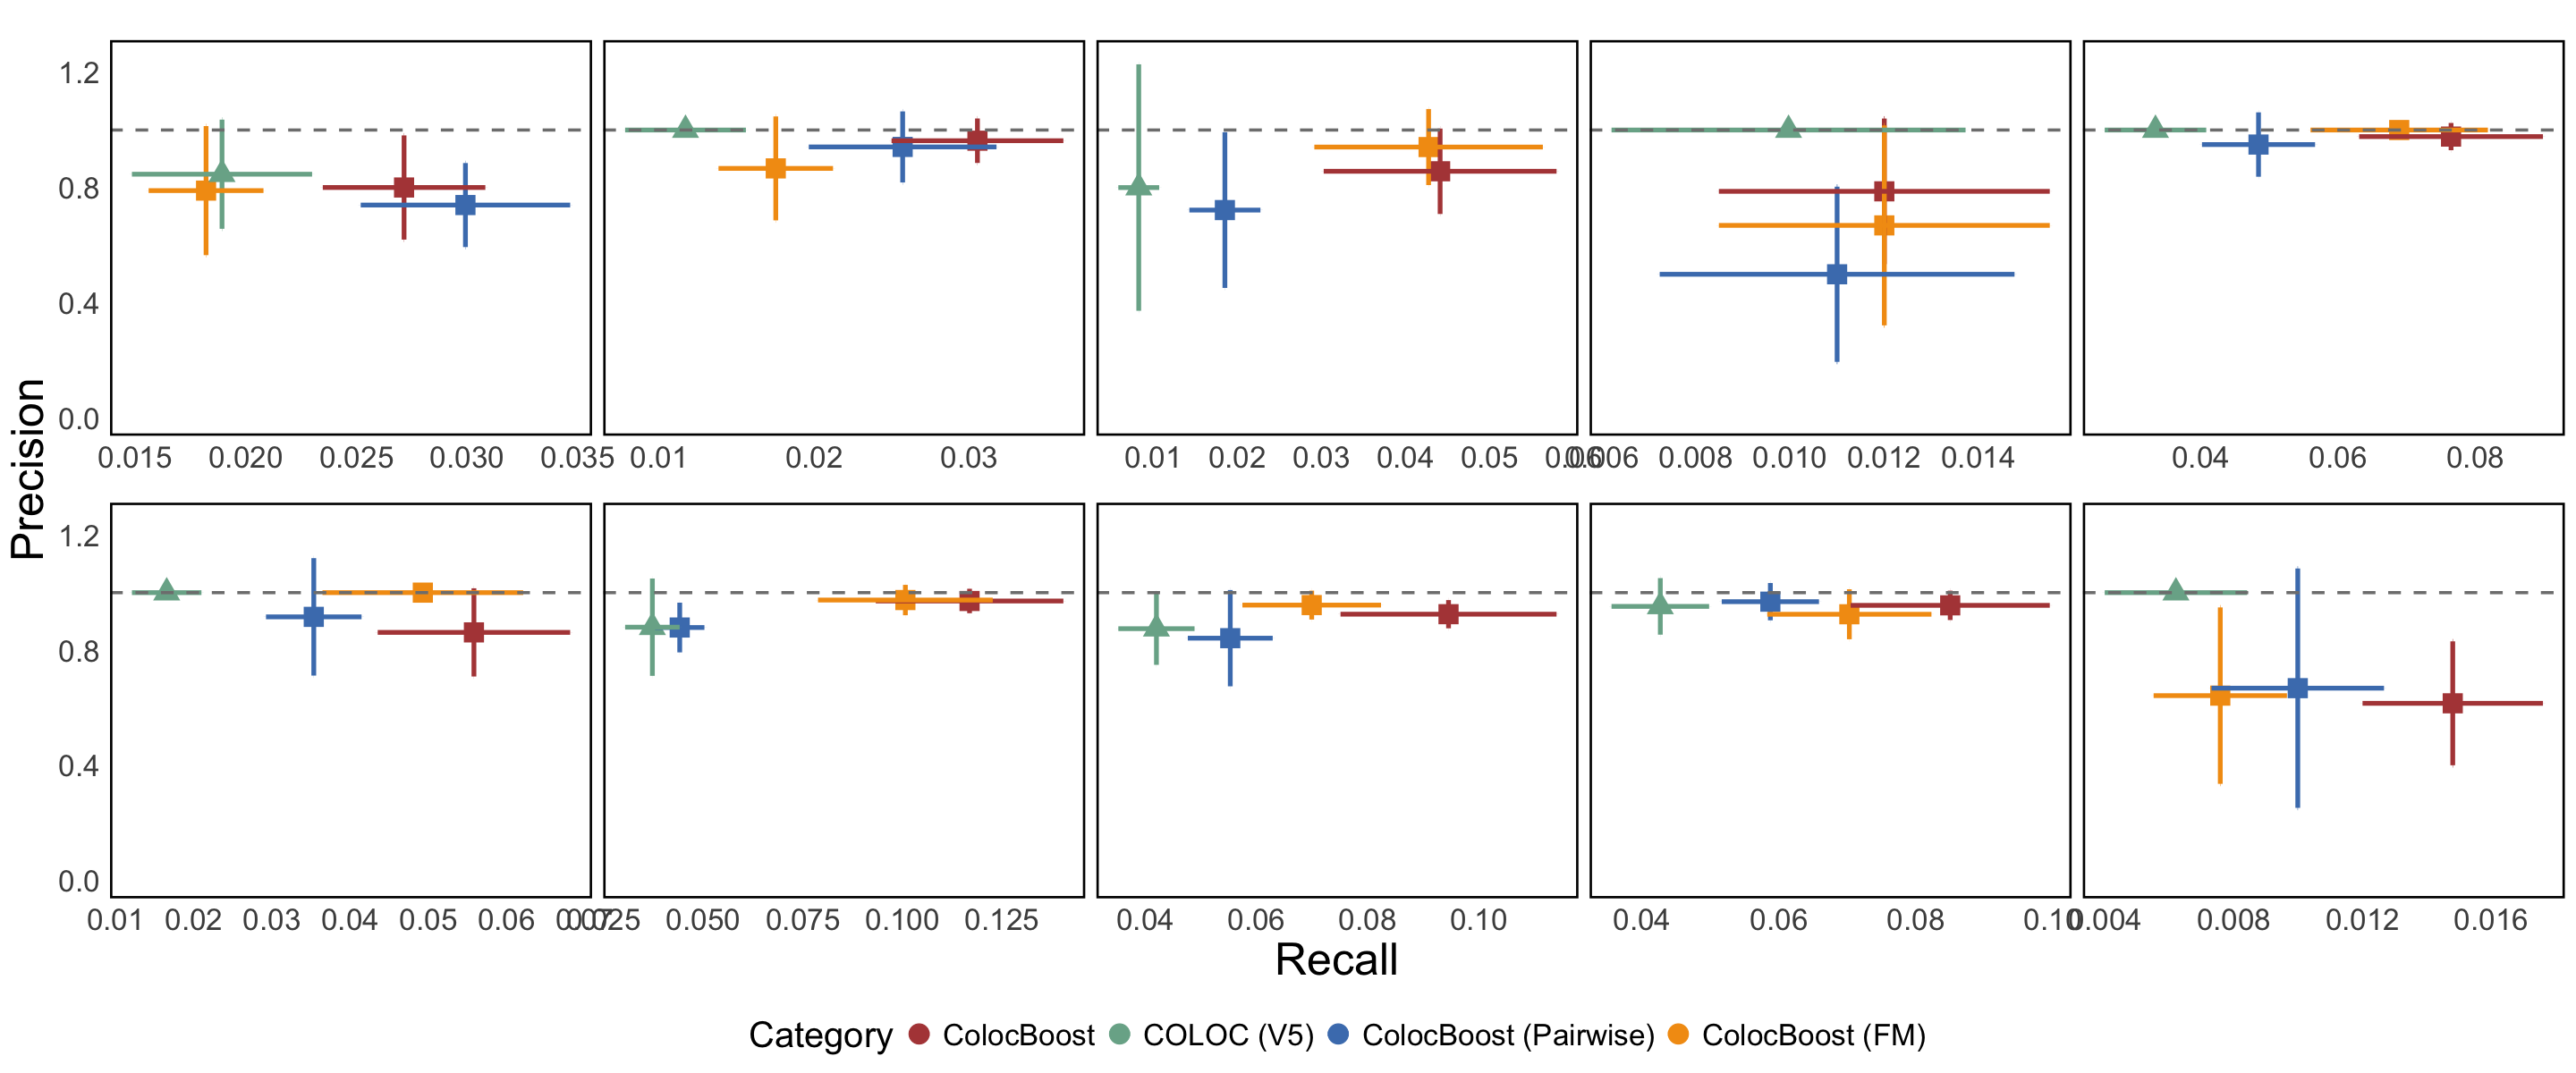

In [14]:
options(repr.plot.width = 24, repr.plot.height = 10)
p1

## Figure S11c,d
Manhattan plot of the MaxVCP functional annotation scores of variants from c. Pairwise-ColocBoost-union and d. COLOC-union, with labeled genes containing variants with MaxVCP>0.5. Microglia contributions are highlighted in green.

Note: we only include the information for the colocalized variants in 95% CoS from both ColocBoost and COLOC for this reproducable purpose.

In [22]:
data <- readRDS("Figure_S11c.rds")
don <- data$don
axisdf <- data$axisdf
anno_info <- data$anno_info
library(ggplot2)
library(ggrepel)
p1 <- ggplot(don, aes(x=BPcum, y=VCP)) +
  
  # Show all points
  geom_point( aes(color=as.factor(CHR)), alpha=0.8, size=1.6) +
  scale_color_manual(values = rep(c("#2166AC", "#92C5DE"), 22 )) +
  geom_hline(yintercept = 0.5, linetype = "dashed", color = "red", linewidth = 1) +
  # annotate("text", x = 600000, y = 0.53, label = "maxVCP=0.5", color = "red", size = 5, hjust = 1) +
  
  # custom X axis:
  scale_x_continuous( label = axisdf$CHR, breaks= axisdf$center ) +
  scale_y_continuous(expand = c(0, 0) ) +     # remove space between plot area and x axis
  
  labs(title = "",  x = "", y = "maxVCP", fill = "") +
  ylim(0, 1.02) +
  
  # Add highlighted points
  geom_point(data=subset(don, VCP>=0.5), color="orange", size=2) +
  
  # Add label using ggrepel to avoid overlapping
  geom_label_repel(data = anno_info, aes(label = Gene, fill = micgroup), 
                   size = 5, force = 20, force_pull = 0.5, 
                   box.padding = 0.5, max.overlaps = 40, color = "black") +
  scale_fill_manual(values = c("FALSE" = scales::alpha("#F39B7F", 0.5), "TRUE" = scales::alpha("#79AF97FF", 0.5)) ) +
  theme_minimal(base_size = 15) +
  theme( 
    axis.text.x = element_text(size = 22, angle = 45, hjust = 1),
    axis.text.y = element_text(size = 22),
    axis.title.y = element_text(size = 28),
    legend.position="none",
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.5)
  ) 

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


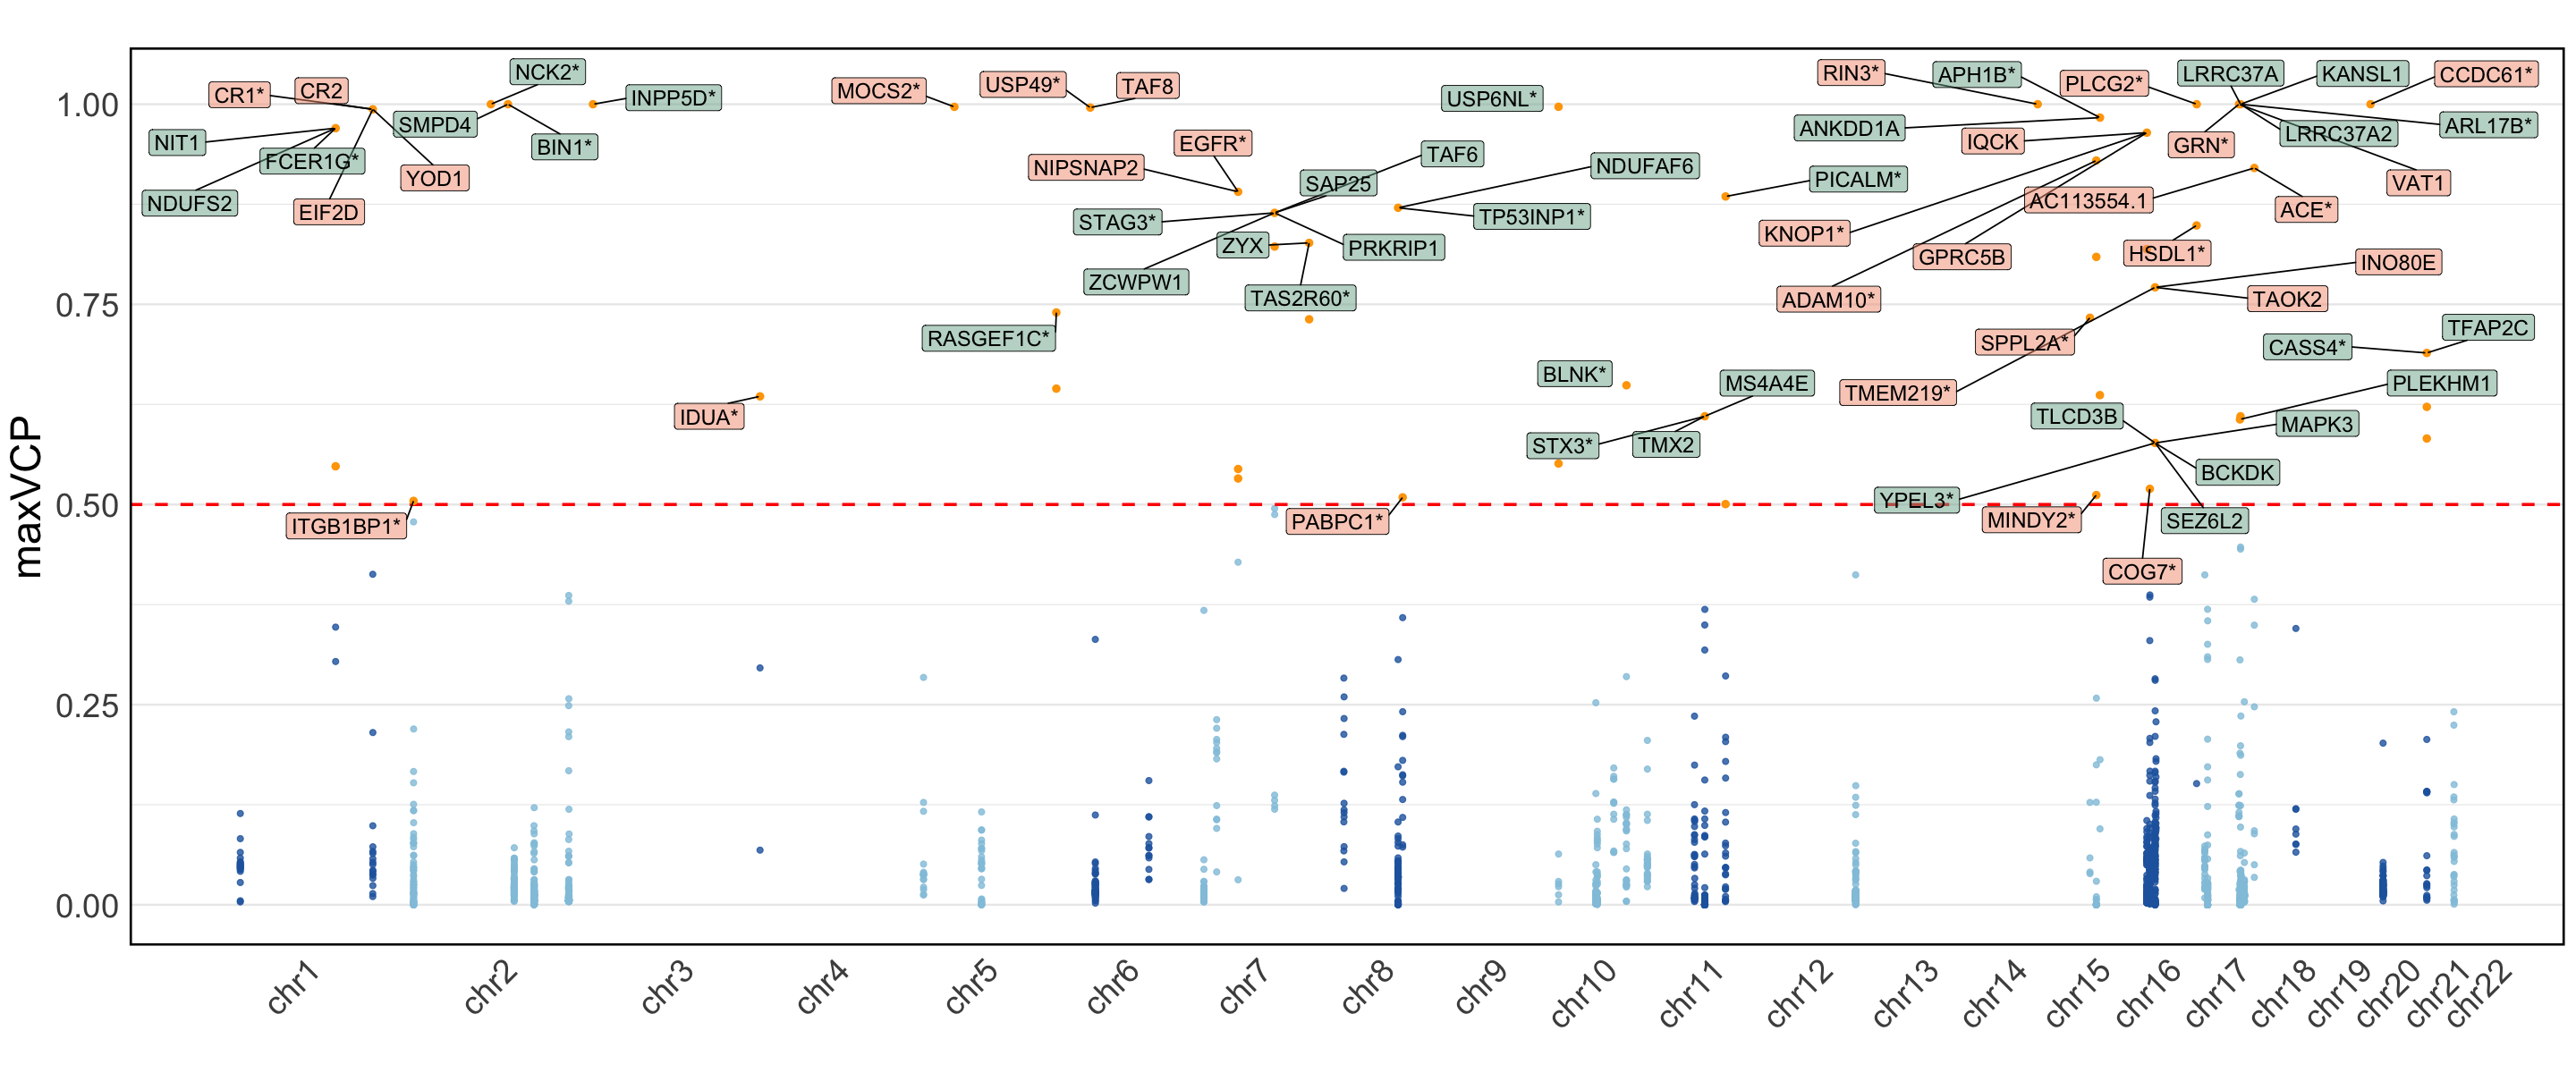

In [23]:
options(repr.plot.width = 24, repr.plot.height = 10)
p1

In [24]:
data <- readRDS("Figure_S11d.rds")
don <- data$don
axisdf <- data$axisdf
anno_info <- data$anno_info
library(ggplot2)
library(ggrepel)
p1 <- ggplot(don, aes(x=BPcum, y=VCP)) +
  
  # Show all points
  geom_point( aes(color=as.factor(CHR)), alpha=0.8, size=1.6) +
  scale_color_manual(values = rep(c("#2166AC", "#92C5DE"), 22 )) +
  geom_hline(yintercept = 0.5, linetype = "dashed", color = "red", linewidth = 1) +
  # annotate("text", x = 600000, y = 0.53, label = "maxVCP=0.5", color = "red", size = 5, hjust = 1) +
  
  # custom X axis:
  scale_x_continuous( label = axisdf$CHR, breaks= axisdf$center ) +
  scale_y_continuous(expand = c(0, 0) ) +     # remove space between plot area and x axis
  
  labs(title = "",  x = "", y = "maxVCP", fill = "") +
  ylim(0, 1.02) +
  
  # Add highlighted points
  geom_point(data=subset(don, VCP>=0.5), color="orange", size=2) +
  
  # Add label using ggrepel to avoid overlapping
  geom_label_repel(data = anno_info, aes(label = Gene, fill = micgroup), 
                   size = 5, force = 20, force_pull = 0.5, 
                   box.padding = 0.5, max.overlaps = 40, color = "black") +
  scale_fill_manual(values = c("FALSE" = scales::alpha("#F39B7F", 0.5), "TRUE" = scales::alpha("#79AF97FF", 0.5)) ) +
  theme_minimal(base_size = 15) +
  theme( 
    axis.text.x = element_text(size = 22, angle = 45, hjust = 1),
    axis.text.y = element_text(size = 22),
    axis.title.y = element_text(size = 28),
    legend.position="none",
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.5)
  ) 

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


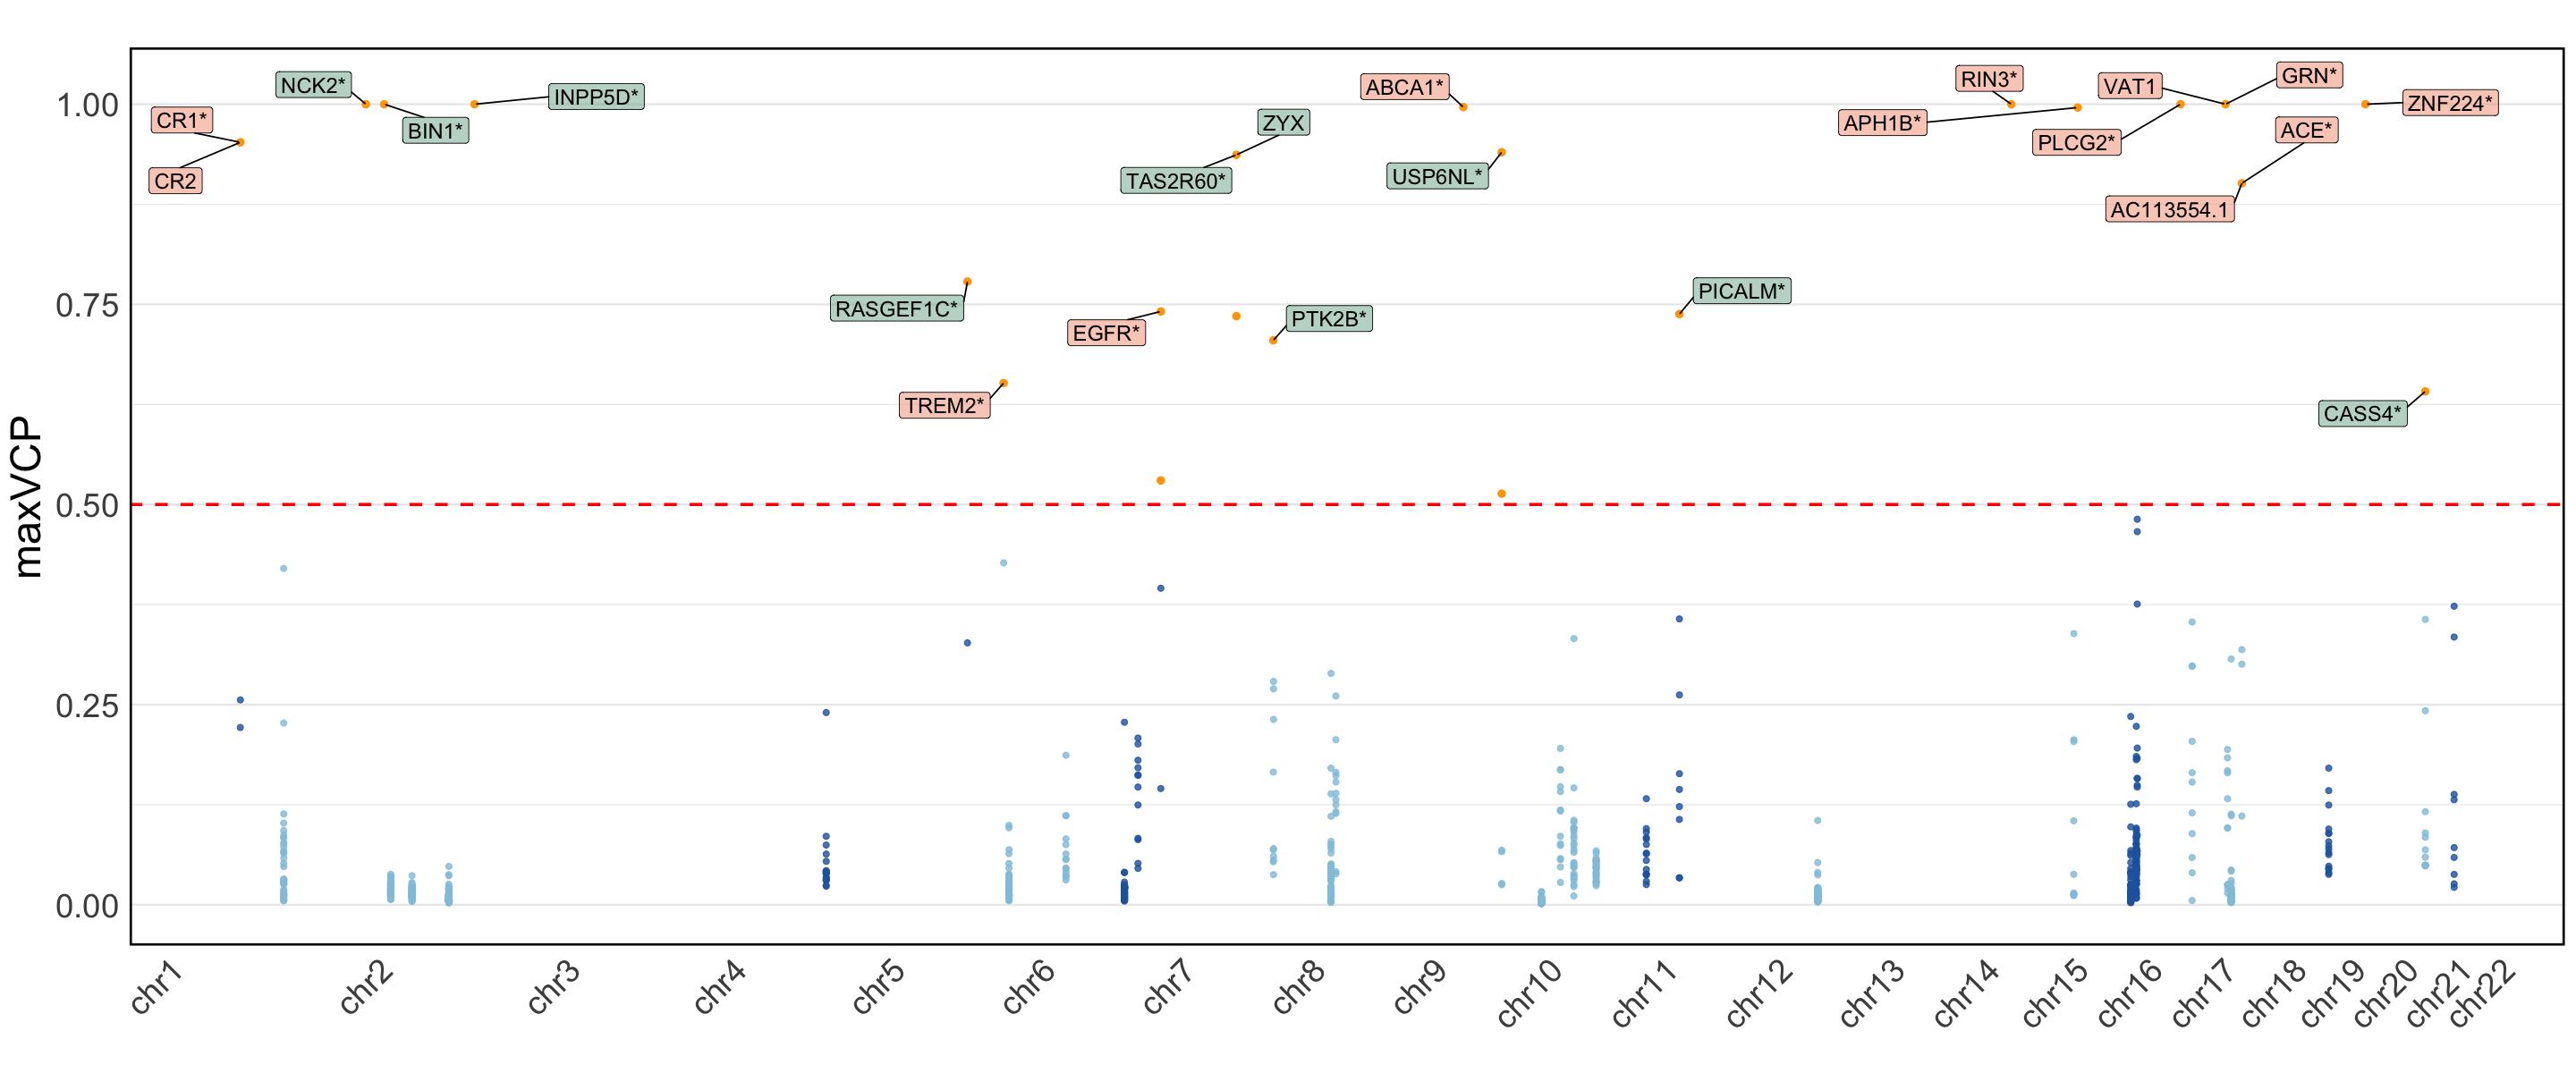

In [25]:
options(repr.plot.width = 24, repr.plot.height = 10)
p1